# IMPORT

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

from PIL import Image
from PIL import ImageOps

from pathlib import Path


# INPUT

In [2]:
def go_data(folder, name):
  '''
    Формирует x и y
  '''
  x, y = [], []
  step_now = None
  print(name)
  for i in range(10):
    p = Path(f"{folder}{i}")
    for path_img in p.rglob("*"):
      if i != step_now:
        print('Folder: ', i)
        step_now = i
      img = plt.imread(path_img)
      x.append(list(img))
      y.append(i)
  return np.array(x), y

In [3]:
x_train, y_train = go_data(folder='C:/Users/Sanchay/Desktop/hind/Hindi-MNIST/train', name='Train')
x_test, y_test = go_data(folder='C:/Users/Sanchay/Desktop/hind/Hindi-MNIST/test', name='Test')

Train
Test


In [4]:
x_train.shape

(0,)

In [5]:
x_test.shape

(0,)

In [6]:
index = 0
plt.imshow(x_train[index])
y_train[index]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [7]:
print(x_train.shape)


(0,)


In [9]:
x_train = x_train.reshape(x_train.shape[0], -1)
print(x_train.shape)
x_train

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [10]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_test.shape

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [11]:
y_train

[]

In [28]:
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [12]:
# Convert to numpy array if not already
y_train = np.array(y_train)
y_test = np.array(y_test)  

In [13]:
import numpy as np

# Assuming indices are straightforward numeric values
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)

# Reordering the data according to the shuffled indices
X_train = x_train[indices]
y_train = y_train[indices]

# You can do the same for X_test and y_test if needed
indices_test = np.arange(x_test.shape[0])
np.random.shuffle(indices_test)
X_test = x_test[indices_test]
y_test = y_test[indices_test]


In [14]:
y_train

array([], dtype=float64)

# MODEL

In [15]:
# Function to find the best k value using the elbow approach
def find_best_k(X_train, y_train, X_test, y_test):
    # List to store accuracies for different k values
    accuracies = [] 
    
    k_values = range(1, 10)  # You can adjust the range based on your computational resources

    for k in k_values:

        # Create a KNN classifier with k value
        knn = KNeighborsClassifier(n_neighbors=k) 

        # Train the classifier on training data
        knn.fit(x_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate accuracy of predictions
        accuracy = accuracy_score(y_test, y_pred)

        # Append accuracy to the list
        accuracies.append(accuracy)
        print(f"k = {k}, Accuracy = {accuracy}")


    # Plot the accuracies for different k values
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Elbow Method for Choosing Optimal k')
    plt.show()

    # Find the best k value based on the highest accuracy
    best_k = k_values[accuracies.index(max(accuracies))]
    return best_k

k = 1, Accuracy = 0.087
k = 2, Accuracy = 0.08966666666666667
k = 3, Accuracy = 0.087
k = 4, Accuracy = 0.08533333333333333
k = 5, Accuracy = 0.08766666666666667
k = 6, Accuracy = 0.08766666666666667
k = 7, Accuracy = 0.08733333333333333
k = 8, Accuracy = 0.09133333333333334
k = 9, Accuracy = 0.09233333333333334


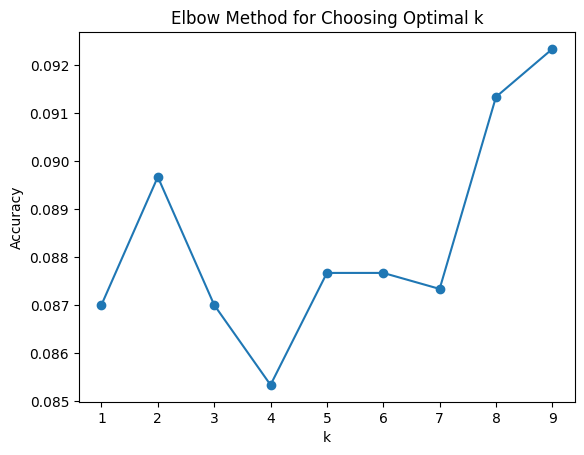

The best value of k is: 9


In [41]:
# Find the best k value
best_k = find_best_k(x_train, y_train, x_test, y_test)
print(f"The best value of k is: {best_k}")

In [16]:
# Train the model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)


NameError: name 'best_k' is not defined

In [43]:
# Predict on the test set
y_pred_best = knn_best.predict(x_test)
y_pred_best

array([2, 3, 5, ..., 1, 5, 2])

In [44]:
# Calculate the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with k = {best_k}: {accuracy_best}")

Accuracy with k = 9: 0.09233333333333334


In [45]:
#Calculate the confusion Matrix
print("Confusion Matrix :", confusion_matrix(y_test,y_pred_best))

Confusion Matrix : [[52 55 30 32 22 24 31 21 18 15]
 [65 35 39 35 18 26 22 18 22 20]
 [58 46 26 40 27 22 21 23 18 19]
 [56 48 39 31 28 28 16 25 17 12]
 [56 51 35 25 31 23 22 25 16 16]
 [55 39 37 24 25 33 21 29 30  7]
 [40 44 39 41 31 31 26 25 15  8]
 [50 49 34 35 30 28 26 10 21 17]
 [57 40 34 28 27 32 34 20 16 12]
 [51 53 37 30 29 22 20 16 25 17]]


# OUTPUT

In [50]:
# Function to preprocess user input image
def preprocess_input_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    img = ImageOps.invert(img)

    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to 32*32 (MNIST dataset format)
    img = img.resize((32, 32))
    # Convert image to numpy array
    img_array = np.array(img)
    # Flatten the image array
    img_array = img_array.reshape(1, -1)

    return img_array

In [53]:
image_path=input("Enter the path to image:")
input_image = preprocess_input_image(image_path)
# Make prediction using KNN classifier
predicted_digit = knn_best.predict(input_image)
print("Predicted digit: ", predicted_digit[0])

Predicted digit:  1
